## Library installation

In [ ]:
#Libraries to import

import pandas as pd
import yfinance as yfinance
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as sgt
import numpy as np
import time

## Data Initialisation (Cleaning)

In [2]:
#Scrapigng the data for stock prices

import yfinance as yf
import pandas as pd
tickers = ["^GSPC", "NDAQ", "AAPL", "NVDA", "MSFT", "NFLX"]
start_date = "2020-01-01"
end_date = "2025-03-01"

data = yf.download(tickers, start=start_date, end=end_date)
data.to_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/Datasets/dataframe.csv')
stocks = pd.read_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/Datasets/dataframe.csv')

[*********************100%***********************]  6 of 6 completed


In [36]:
#Cleaning the data 
stocks.drop(["Close", "Close.1", "Close.2", "Close.3", "Close.4"], axis=1, inplace=True)
stocks.drop(["High", "High.1", "High.2", "High.3", "High.4"], axis=1, inplace=True)
stocks.drop(["Volume", "Volume.1", "Volume.2", "Volume.3", "Volume.4"], axis=1, inplace=True)
stocks.drop(["Low", "Low.1", "Low.2", "Low.3", "Low.4"], axis=1, inplace=True)

In [37]:
stocks.head()

,Price,Close.5,High.5,Low.5,Open,Open.1,Open.2,Open.3,Open.4,Open.5,Volume.5
0,Ticker,^GSPC,^GSPC,^GSPC,AAPL,MSFT,NDAQ,NFLX,NVDA,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,3257.85009765625,3258.139892578125,3235.530029296875,71.72101896406637,151.5668495220527,33.26335090509653,326.1000061035156,5.943831396827032,3244.669921875,3459930000
3,2020-01-03,3234.85009765625,3246.14990234375,3222.340087890625,71.9413434276417,151.12774851363613,33.17652203794167,326.7799987792969,5.852961693799672,3226.360107421875,3484700000
4,2020-01-06,3246.280029296875,3246.840087890625,3214.639892578125,71.12785848416316,149.9440697335836,33.42772256063357,323.1199951171875,5.783752677551418,3217.550048828125,3702460000


In [38]:
#Complete remaining data cleaning in Excel and then reimport back:
# Save the DataFrame to an Excel file
# Save the DataFrame to a CSV file
stocks.to_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/dataframe.csv', index=False)


In [3]:
#Decided to change the variable name to dataframe after edits made in Excel for clarity
#Treated 'stocks' variable still as raw and uncleaned data
df = pd.read_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/Datasets/dataframe_cleaned.csv')

In [40]:
df = df.round(2)
df.head()

,Date,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
0,02/01/2020,3244.67,33.26,71.72,151.57,326.10,5.94
1,03/01/2020,3226.36,33.18,71.94,151.13,326.78,5.85
2,06/01/2020,3217.55,33.43,71.13,149.94,323.12,5.78
3,07/01/2020,3241.86,33.49,72.59,152.08,336.47,5.93
4,08/01/2020,3238.59,33.03,71.94,151.71,331.49,5.97


In [41]:
import time
if isinstance(df.index, pd.DatetimeIndex):
    print("Time Series has been set")
else:
    print("Time Series has not been set yet")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    time.sleep(3)
    print("It has been done now!")

    

Time Series has not been set yet
It has been done now!


In [42]:
df.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,4311.514179,54.204611,154.549044,292.355351,485.037556,41.311928
std,812.911129,11.877937,43.819747,83.687970,174.911581,41.099052
min,2290.710000,23.960000,55.350000,131.140000,163.960000,4.980000
25%,3834.690000,47.150000,127.750000,230.230000,361.020000,13.750000
50%,4233.830000,54.910000,152.110000,279.610000,485.590000,21.840000
75%,4690.860000,60.550000,180.250000,358.160000,584.890000,47.470000
max,6134.500000,84.000000,257.910000,464.300000,1060.000000,153.030000


In [ ]:
#Segregating dataset into the training and testing model. We have decided to go for a (70:30 split)
#df = training set
#df_test = testing set
size = int(len(df)*0.7)
df, df_test = df.iloc[:size], df.iloc[size:] #df = training set and has 70% of the data, 
                                             #df_test = testing set and has 30% of the data

In [46]:
df.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,3913.545854,50.243605,133.809438,246.777905,419.231852,18.359603
std,522.818995,9.949110,31.931321,49.617739,126.962349,8.875677
min,2290.710000,23.960000,55.350000,131.140000,163.960000,4.980000
25%,3595.190000,40.890000,117.885000,207.605000,326.765000,12.955000
50%,3990.080000,51.830000,140.390000,246.830000,428.200000,16.150000
75%,4325.765000,58.095000,156.340000,283.470000,515.355000,22.615000
max,4804.510000,68.130000,194.550000,356.870000,692.350000,47.440000


In [47]:
df_test.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,5237.045641,63.416487,202.781923,398.352128,638.078000,94.690795
std,580.434900,10.855576,26.215709,38.626054,175.517531,36.866267
min,4139.390000,46.540000,164.570000,307.440000,351.000000,40.430000
25%,4742.377500,55.112500,178.760000,372.567500,481.997500,49.680000
50%,5255.700000,60.050000,193.575000,411.160000,627.235000,94.620000
75%,5737.720000,73.035000,226.900000,423.125000,713.560000,129.187500
max,6134.500000,84.000000,257.910000,464.300000,1060.000000,153.030000


## Visualising data and preparing for training phase

Text(0.5, 1.0, 'Stock Prices')

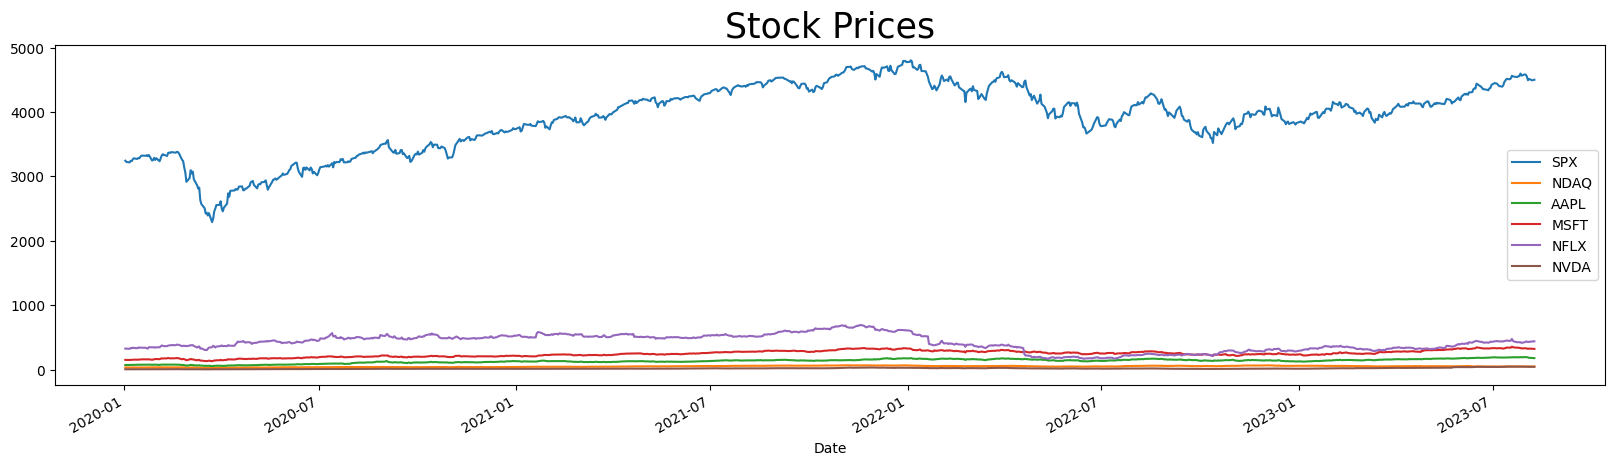

In [48]:
#We find that our S&P 500 prices is shown to be significantly higher compared to the other stocks, 
#so we should normalise prices, so they are in base units.
import matplotlib.pyplot as plt
df.plot(figsize=(20,5))
plt.title("Stock Prices", size = 25)

In [49]:
#We should normalise and log stock prices for both the training and testing sets, so that we are consistent throughout
df_norm = df/df.iloc[0]*100 #Create a new variable incase we want to visualise/test/forecast with the original data
df_norm_test = df_test/df.iloc[0]*100

import numpy as np   
df_log = np.log(df / df.shift(1))
df_log_test = np.log(df_test / df_test.shift(1))

Text(0.5, 1.0, 'Normalised Stock Prices')

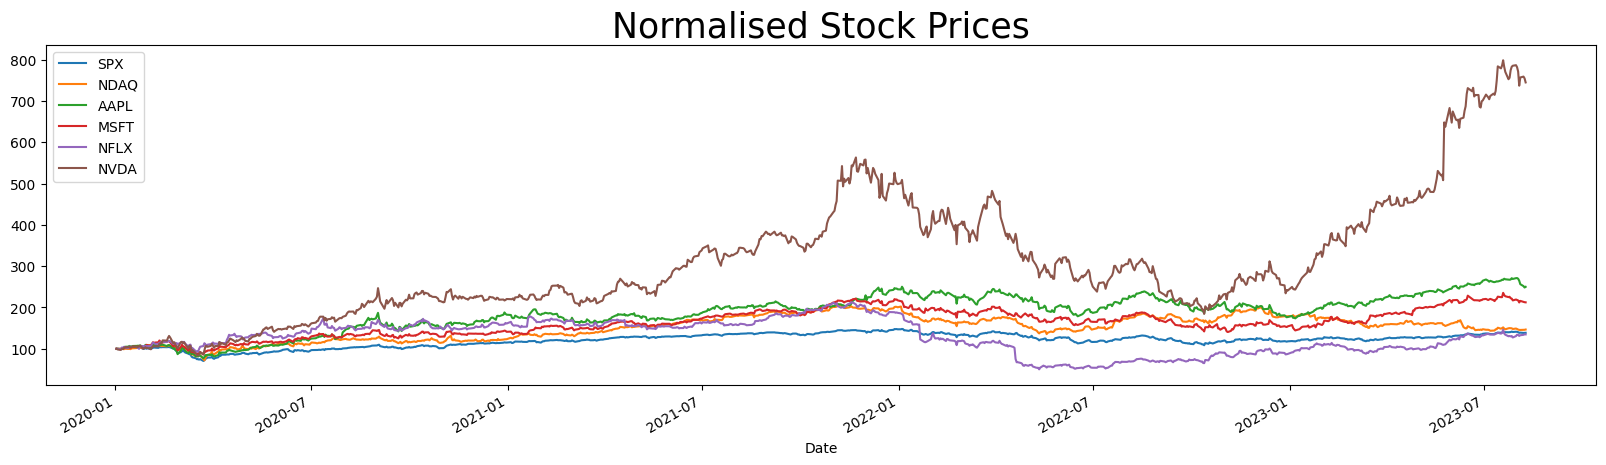

In [51]:
df_norm.plot(figsize=(20,5))
plt.title("Normalised Stock Prices", size = 25) 

Text(0.5, 1.0, 'Normalised Stock Prices')

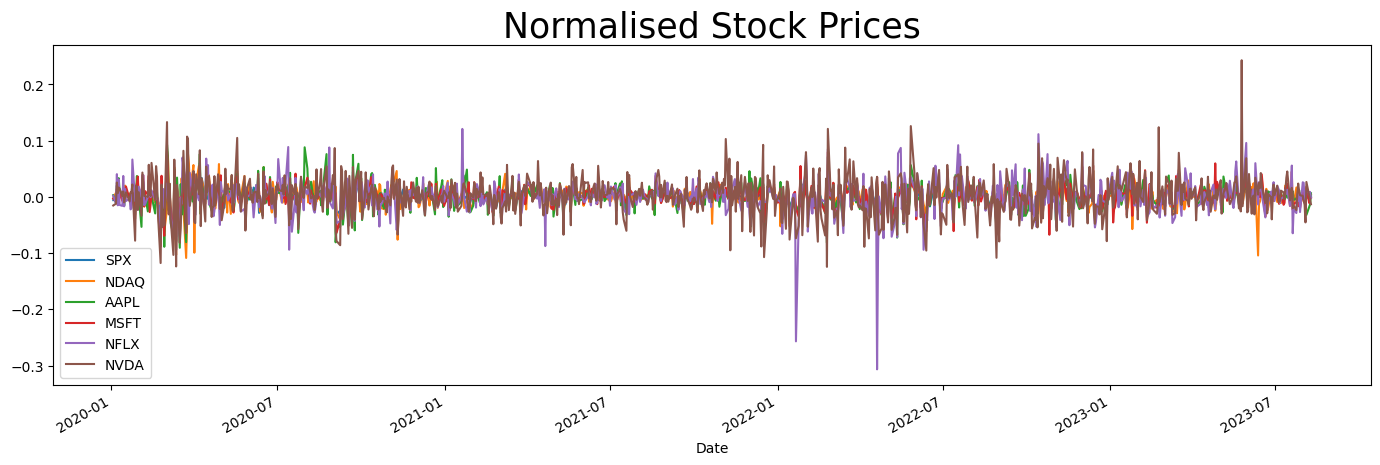

In [54]:
df_log.plot(figsize=(17,5))
plt.title("Normalised Stock Prices", size = 25) 

In [55]:
df.head(), df_log.head() 
#Since we have now log transformed our data, we need to be 
#careful when doing making interpretations

(                SPX   NDAQ   AAPL    MSFT    NFLX  NVDA
 Date                                                   
 2020-01-02  3244.67  33.26  71.72  151.57  326.10  5.94
 2020-01-03  3226.36  33.18  71.94  151.13  326.78  5.85
 2020-01-06  3217.55  33.43  71.13  149.94  323.12  5.78
 2020-01-07  3241.86  33.49  72.59  152.08  336.47  5.93
 2020-01-08  3238.59  33.03  71.94  151.71  331.49  5.97,
                  SPX      NDAQ      AAPL      MSFT      NFLX      NVDA
 Date                                                                  
 2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN
 2020-01-03 -0.005659 -0.002408  0.003063 -0.002907  0.002083 -0.015267
 2020-01-06 -0.002734  0.007506 -0.011323 -0.007905 -0.011263 -0.012038
 2020-01-07  0.007527  0.001793  0.020318  0.014171  0.040485  0.025621
 2020-01-08 -0.001009 -0.013831 -0.008995 -0.002436 -0.014911  0.006723)